# NCAA March Madness - Data Exploration 🏀📊

### Project Overview
This notebook explores historical **NCAA tournament data** to analyze team performance and trends.  
We'll load the datasets, clean them, check for missing values, and visualize key patterns.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use("ggplot")
sns.set_theme()


## 🔍 Loading the Datasets
The datasets include:
- **Regular Season Results:** All games played before the tournament.
- **Tournament Results:** Past NCAA tournament games.
- **Seeds:** Team seed rankings for each tournament.
- **Teams:** Team ID and names.

We'll start by loading these datasets into Pandas DataFrames.


In [5]:
# Load datasets
# These CSV files contain historical NCAA tournament and season results
season_results = pd.read_csv("../data/MRegularSeasonCompactResults.csv")  # Regular season game results
tourney_results = pd.read_csv("../data/MNCAATourneyCompactResults.csv")   # Tournament results
seeds = pd.read_csv("../data/MNCAATourneySeeds.csv")                      # Team seeding information
teams = pd.read_csv("../data/MTeams.csv")                                 # Team names and IDs

# Display first few rows of each dataset
print("Regular Season Results:")
display(season_results.head())

print("\nTournament Results:")
display(tourney_results.head())

print("\nSeeds:")
display(seeds.head())

print("\nTeams:")
display(teams.head())

Regular Season Results:


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0



Tournament Results:


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0



Seeds:


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374



Teams:


,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2025
1,1102,Air Force,1985,2025
2,1103,Akron,1985,2025
3,1104,Alabama,1985,2025
4,1105,Alabama A&M,2000,2025


In [6]:
print("Season Results Columns:", season_results.columns)
print("Tournament Results Columns:", tourney_results.columns)
print("Seeds Columns:", seeds.columns)
print("Teams Columns:", teams.columns)



Season Results Columns: Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT'],
      dtype='object')
Tournament Results Columns: Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT'],
      dtype='object')
Seeds Columns: Index(['Season', 'Seed', 'TeamID'], dtype='object')
Teams Columns: Index(['TeamID', 'TeamName', 'FirstD1Season', 'LastD1Season'], dtype='object')


In [7]:
print("\nMissing values in Regular Season Results:")
print(season_results.isnull().sum())

print("\nMissing values in Tournament Results:")
print(tourney_results.isnull().sum())

print("\nMissing values in Seeds:")
print(seeds.isnull().sum())

print("\nMissing values in Teams:")
print(teams.isnull().sum())




Missing values in Regular Season Results:
Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
dtype: int64

Missing values in Tournament Results:
Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
dtype: int64

Missing values in Seeds:
Season    0
Seed      0
TeamID    0
dtype: int64

Missing values in Teams:
TeamID           0
TeamName         0
FirstD1Season    0
LastD1Season     0
dtype: int64


In [8]:
print("\nRegular Season Results Summary:")
print(season_results.describe())

print("\nTournament Results Summary:")
print(tourney_results.describe())

print("\nSeeds Summary:")
print(seeds.describe())




Regular Season Results Summary:
              Season         DayNum        WTeamID         WScore  \
count  192497.000000  192497.000000  192497.000000  192497.000000   
mean     2006.339460      73.746744    1287.596679      76.862658   
std        11.657443      34.251381     104.933562      11.829703   
min      1985.000000       0.000000    1101.000000      34.000000   
25%      1997.000000      45.000000    1199.000000      69.000000   
50%      2007.000000      76.000000    1285.000000      76.000000   
75%      2016.000000     103.000000    1380.000000      84.000000   
max      2025.000000     132.000000    1480.000000     186.000000   

             LTeamID         LScore          NumOT  
count  192497.000000  192497.000000  192497.000000  
mean     1283.383149      64.781108       0.049003  
std       105.120186      11.199357       0.259039  
min      1101.000000      20.000000       0.000000  
25%      1191.000000      57.000000       0.000000  
50%      1281.000000      6

## 📊 Visualizing Score Distributions
We analyze how teams perform by looking at **winning and losing scores** across all games.


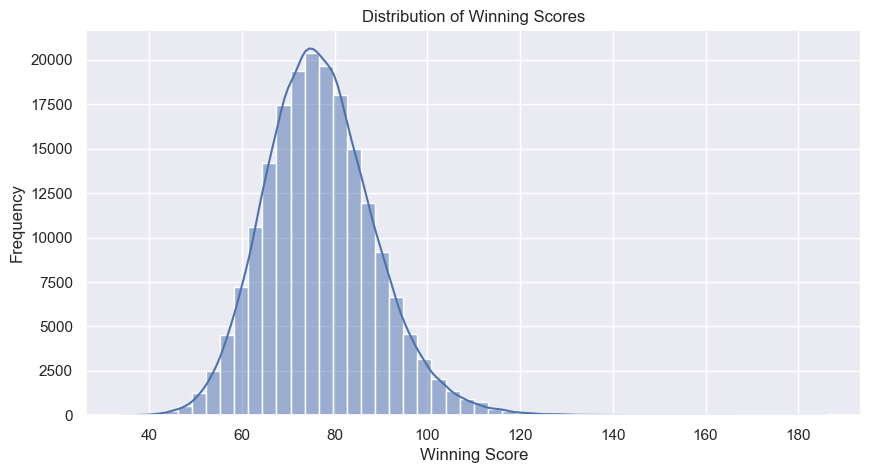

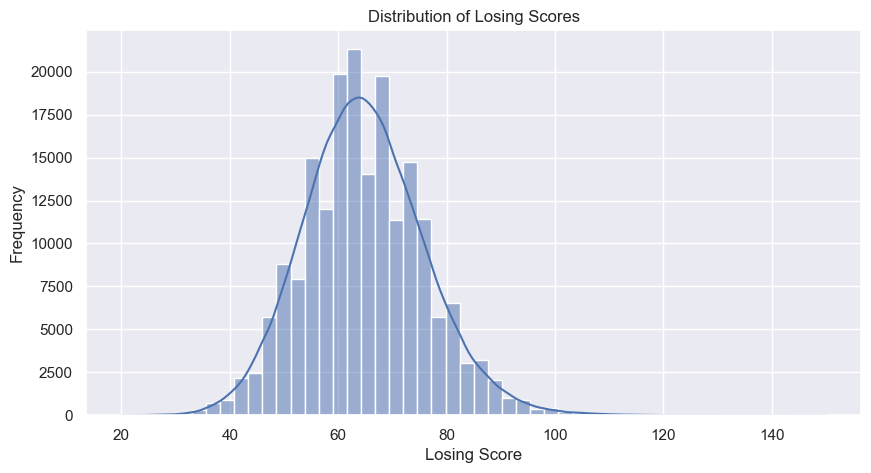

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(season_results['WScore'], bins=50, kde=True)
plt.title("Distribution of Winning Scores")
plt.xlabel("Winning Score")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(season_results['LScore'], bins=50, kde=True)
plt.title("Distribution of Losing Scores")
plt.xlabel("Losing Score")
plt.ylabel("Frequency")
plt.show()



/var/folders/b6/334xky6x2fv2zxtx9q2rp4m00000gn/T/ipykernel_35027/523822061.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.index, y=top_teams.values, palette="viridis")


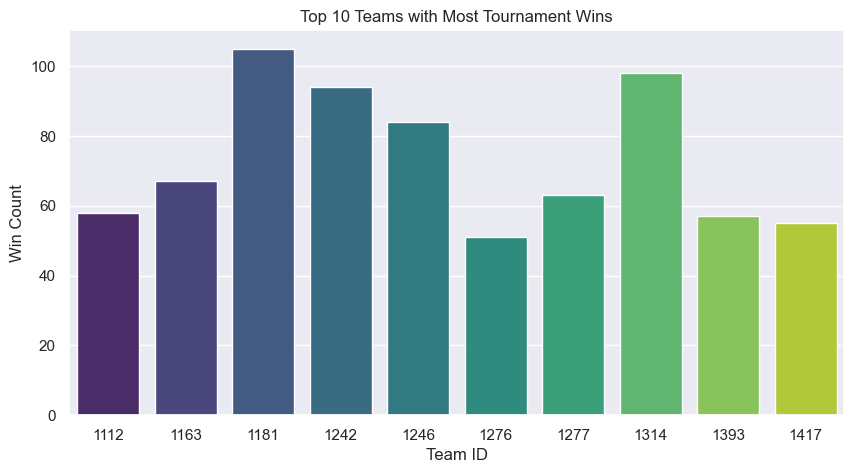

In [11]:
top_teams = tourney_results['WTeamID'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_teams.index, y=top_teams.values, palette="viridis")
plt.title("Top 10 Teams with Most Tournament Wins")
plt.xlabel("Team ID")
plt.ylabel("Win Count")
plt.show()
